In [8]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [38]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [39]:
bas_path='C:\\Users\\anith\\Downloads\\tensorflow-speech-recognition-challenge\\train\\train\\audio\\'

In [40]:
import os
import IPython.display as ipd
from scipy.io import wavfile
import warnings
warnings.filterwarnings('ignore')

In [41]:
os.listdir("C:\\Users\\anith\\Downloads\\tensorflow-speech-recognition-challenge")

['extracted_test',
 'link_to_gcp_credits_form.txt',
 'sample_submission',
 'sample_submission.7z',
 'test.7z',
 'train',
 'train.7z']

In [42]:
base_path = "C:\\Users\\anith\\Downloads\\tensorflow-speech-recognition-challenge\\train\\train\\audio\\"

In [43]:
#file_name="C:\\Users\\anith\Downloads\\tensorflow-speech-recognition-challenge\\train\train\\audio\\_background_noise_\\doing_the_dishes.wav"

In [44]:
file_name='_background_noise_/doing_the_dishes.wav'

In [45]:
file_path=bas_path + file_name

In [46]:
samples, sample_rate = librosa.load(file_path, sr=16000)

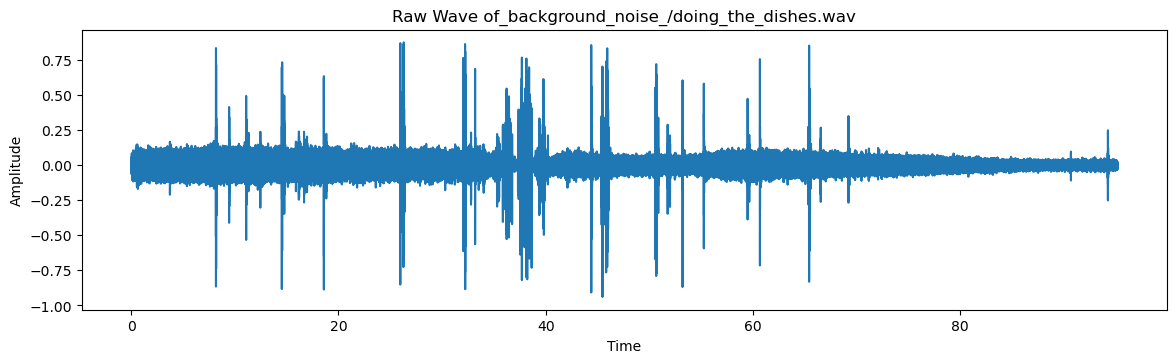

In [47]:
fig= plt.figure(figsize=(14,8))
ax1=fig.add_subplot(211)
ax1.set_title('Raw Wave of' + file_name)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0,len(samples)/ sample_rate, num=len(samples)), samples)
plt.show()


In [48]:
file_name='yes/0a7c2a8d_nohash_0.wav'

In [49]:
file_path=bas_path + file_name

In [50]:
samples, sample_rate = librosa.load(file_path, sr=16000)

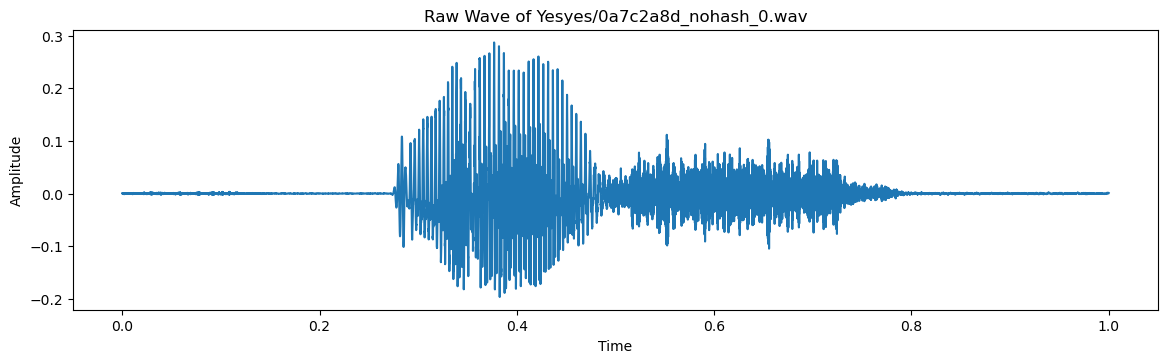

In [51]:
fig= plt.figure(figsize=(14,8))
ax1=fig.add_subplot(211)
ax1.set_title('Raw Wave of Yes' + file_name)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0,len(samples)/ sample_rate, num=len(samples)), samples)
plt.show()


In [52]:
spectrogram= librosa.feature.melspectrogram(y=samples, sr=sample_rate)

In [53]:
spectrogram_db=librosa.power_to_db(spectrogram)

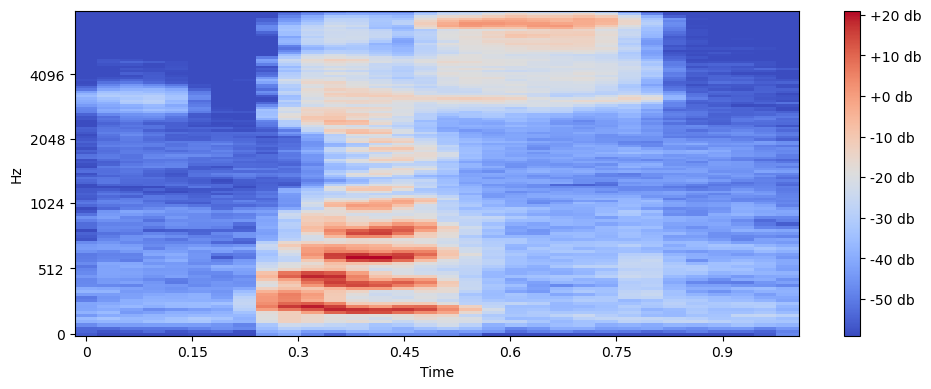

In [54]:
fig= plt.figure(figsize=(10,4))
librosa.display.specshow(spectrogram_db,sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f db")
ax1.set_title('Spectrogram' + file_name)
ax1.set_xlabel('Time')
ax1.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [55]:
ipd.Audio(samples, rate=sample_rate)

In [56]:
print(sample_rate)

16000


In [57]:
from scipy.signal import resample
import IPython.display as ipd

In [58]:
target_sr=8000

number_samples=int(len(samples)* target_sr/sample_rate)
resample=resample(samples, number_samples)
resample_sr=target_sr

In [59]:
ipd.Audio(resample, rate=resample_sr)

In [60]:
print("Resampled sample Rate:", resample_sr)

Resampled sample Rate: 8000


In [61]:
labels=os.listdir(base_path)

In [62]:
no_of_recording=[]
for label in labels:
    waves=[f for f in os.listdir(bas_path +'/'+label) if f.endswith('.wav')]
    no_of_recording.append(len(waves))

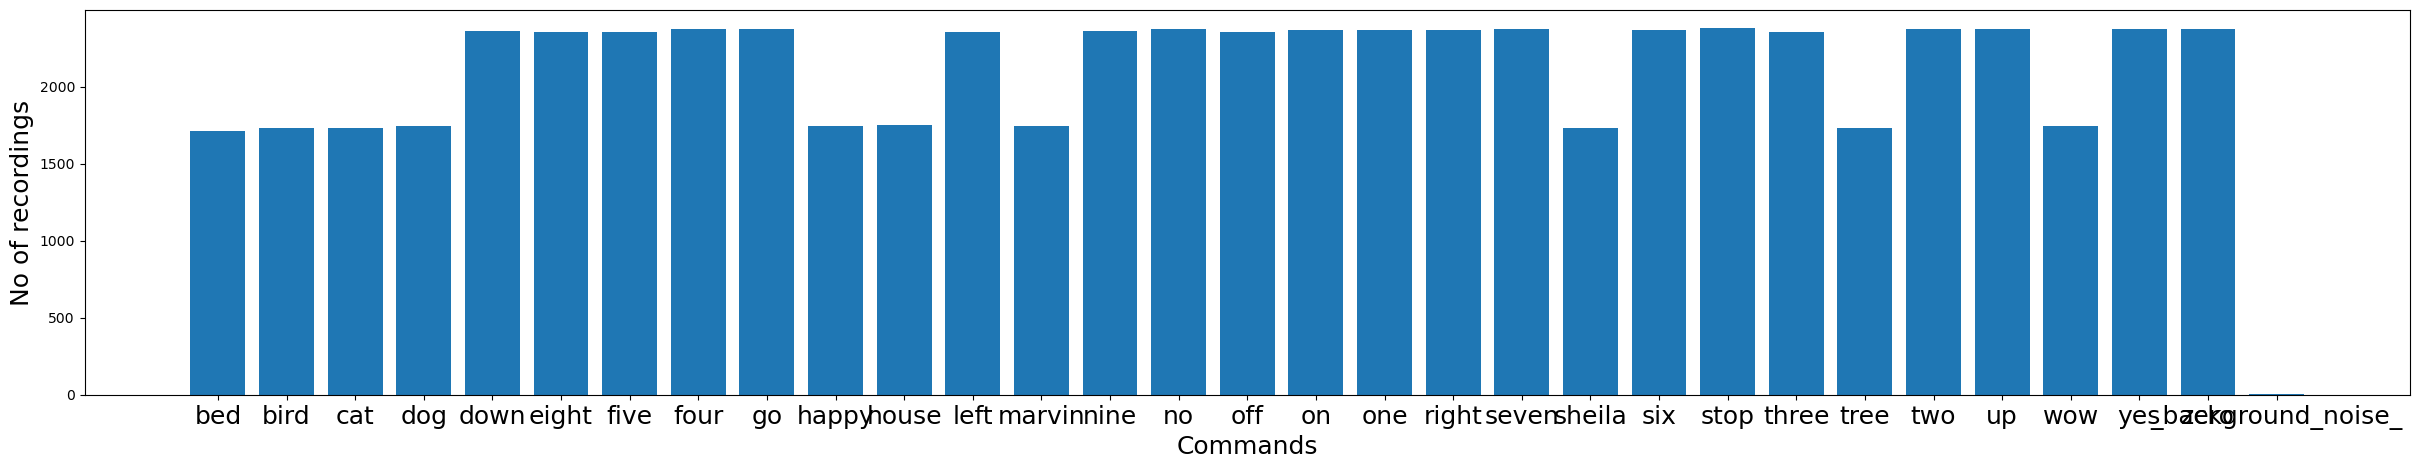

In [63]:
fig= plt.figure(figsize=(30,5))
index=np.arange(len(labels))
plt.bar(index,no_of_recording)

plt.xlabel('Commands', fontsize=18)
plt.ylabel('No of recordings', fontsize=18)
plt.xticks(index, labels, fontsize=18)
plt.show()

In [64]:
train_audio_path = 'C:\\Users\\anith\\Downloads\\tensorflow-speech-recognition-challenge\\train\\train\\audio\\'


In [65]:
from scipy.signal import resample 
import librosa
all_wave=[]
all_label=[]

In [66]:



for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + label) if f.endswith('.wav')]
    
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + label + '\\' + wav, sr=16000)
        
        
        target_sr = 8000
        num_samples_resampled = int(len(samples) * target_sr / sample_rate)
        samples_resampled = resample(samples, num_samples_resampled)
 
        if len(samples_resampled) == target_sr * 1: 
            all_wave.append(samples_resampled)
            all_label.append(label)
        

    

bed
bird
cat
dog
down
eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
wow
yes
zero
_background_noise_


In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(all_label)
clases=list(le.classes_)

In [68]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [69]:
all_wave=np.array(all_wave).reshape(-1,8000,1)

In [70]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val= train_test_split(np.array(all_wave), np.array(y), stratify=y, test_size=0.2, random_state=777, shuffle=True)

In [71]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()


In [72]:
inputs = Input(shape=(8000,1))

conv= Conv1D(8,13, padding='valid', activation="relu", strides=1)(inputs)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

conv= Conv1D(16,11, padding='valid', activation="relu", strides=1)(inputs)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

conv= Conv1D(32,11, padding='valid', activation="relu", strides=1)(inputs)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

conv= Conv1D(64,11, padding='valid', activation="relu", strides=1)(inputs)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

conv=Flatten()(conv)

conv=Dense(256, activation='relu')(conv)
conv=Dropout(0.3)(conv)

conv=Dense(128, activation='relu')(conv)
conv=Dropout(0.3)(conv)

outputs= Dense(len(labels), activation='softmax')(conv)
model=Model(inputs, outputs)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d_3 (Conv1D)           (None, 7990, 64)          768       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2663, 64)         0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 2663, 64)          0         
                                                                 
 flatten (Flatten)           (None, 170432)            0         
                                                                 
 dense (Dense)               (None, 256)               43630848  
                                                             

In [73]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
es=EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=10, min_delta=0.0001)
mc=ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [75]:
history=model.fit(x_tr, y_tr, epochs=20,callbacks=[es,mc], batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
1457/1457 [==============================] - 644s 439ms/step - loss: 2.8888 - accuracy: 0.1635 - val_loss: 2.2958 - val_accuracy: 0.3082
Epoch 2/20
1457/1457 [==============================] - 660s 453ms/step - loss: 2.2578 - accuracy: 0.3184 - val_loss: 1.9491 - val_accuracy: 0.4223
Epoch 3/20
1457/1457 [==============================] - 645s 443ms/step - loss: 1.9153 - accuracy: 0.4150 - val_loss: 1.6965 - val_accuracy: 0.4976
Epoch 4/20
1457/1457 [==============================] - 823s 565ms/step - loss: 1.7016 - accuracy: 0.4761 - val_loss: 1.6173 - val_accuracy: 0.5222
Epoch 5/20
1457/1457 [==============================] - 1001s 687ms/step - loss: 1.5448 - accuracy: 0.5208 - val_loss: 1.5572 - val_accuracy: 0.5438
Epoch 6/20
1457/1457 [==============================] - 1000s 686ms/step - loss: 1.4276 - accuracy: 0.5590 - val_loss: 1.5269 - val_accuracy: 0.5505
Epoch 7/20
1457/1457 [==============================] - 1200s 823ms/step - loss: 1.3303 - accuracy: 0.5887 - v

In [76]:
from keras.models import load_model, save_model
save_model(model,'best_model.hdf5')

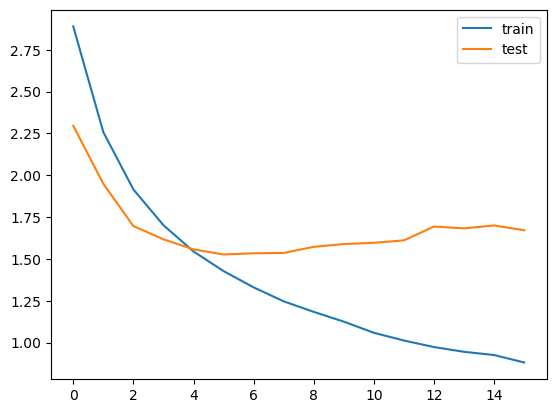

In [77]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [96]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return clases[index]

In [97]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:", clases[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)


Audio: down


In [98]:
print("Text:",predict(samples))

1/1 [==============================] - 0s 107ms/step
Text: seven
